In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing

In [76]:
df = pd.read_csv("auto.csv")

In [77]:
#### Part I
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [78]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [79]:
regr = linear_model.LinearRegression()


df['horsepower'] = pd.to_numeric(df['horsepower'], errors = 'coerce').fillna(0)

x = df['horsepower'].values.reshape(-1, 1)
y = df['mpg'].values.reshape(-1, 1)
regr.fit(x, y)

x_w_intercept = np.zeros(shape = (x.shape[0], 2), dtype = np.float)
x_w_intercept[:, 0] = 1
x_w_intercept[:, 1] = df['horsepower'].values

ols = sm.OLS(y, x_w_intercept)
ols_result = ols.fit()
print(ols_result.summary())

estimated_std = (np.sum((y - regr.predict(y))**2)/((x.shape[0])-2))**0.5

print(f'The R2 for the regression is {regr.score(x, y)}; beta_0 is {regr.intercept_}, beta_1 is {regr.coef_}')
print(f'The predicted mpg associated with a horsepower of 98 is {regr.predict([[98]])}. \n The associated 95% confidence interval of this prediction is {(np.mean(y)-1.96*np.std(y), 1.96*np.std(y)+np.mean(y))} \n The associated prediction inverval is {regr.predict([[98]])-1.96*estimated_std, regr.predict([[98]])+1.96*estimated_std}')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     543.5
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           3.10e-76
Time:                        22:12:47   Log-Likelihood:                -1207.8
No. Observations:                 397   AIC:                             2420.
Df Residuals:                     395   BIC:                             2428.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.8792      0.707     55.019      0.0

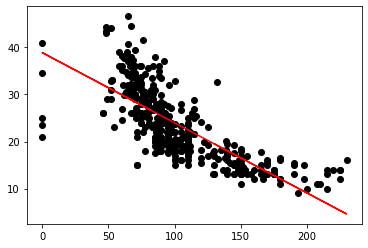

In [80]:
#Plot the actual mpg value and predicted mpg value
df_pred = pd.DataFrame({'x': df['horsepower'], 'y_actual': df['mpg'].values, 'y_pred': regr.predict(x).flatten()})
plt.scatter(df_pred['x'], df_pred['y_actual'], color = "black")
plt.plot(df_pred['x'], df_pred['y_pred'], color = 'red')

The residual plot shows that the errors are correlated.


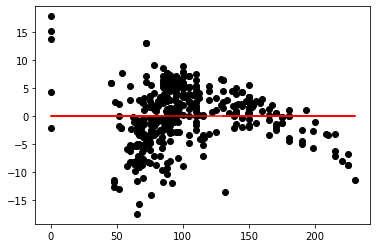

In [81]:
df_pred['error'] = df_pred['y_pred']-df_pred['y_actual']
plt.scatter(df_pred['x'], df_pred['error'], color = "black")
plt.plot(df_pred['x'], np.zeros(shape = (x.shape)), color = 'red')

print(f"The residual plot shows that the errors are correlated.")

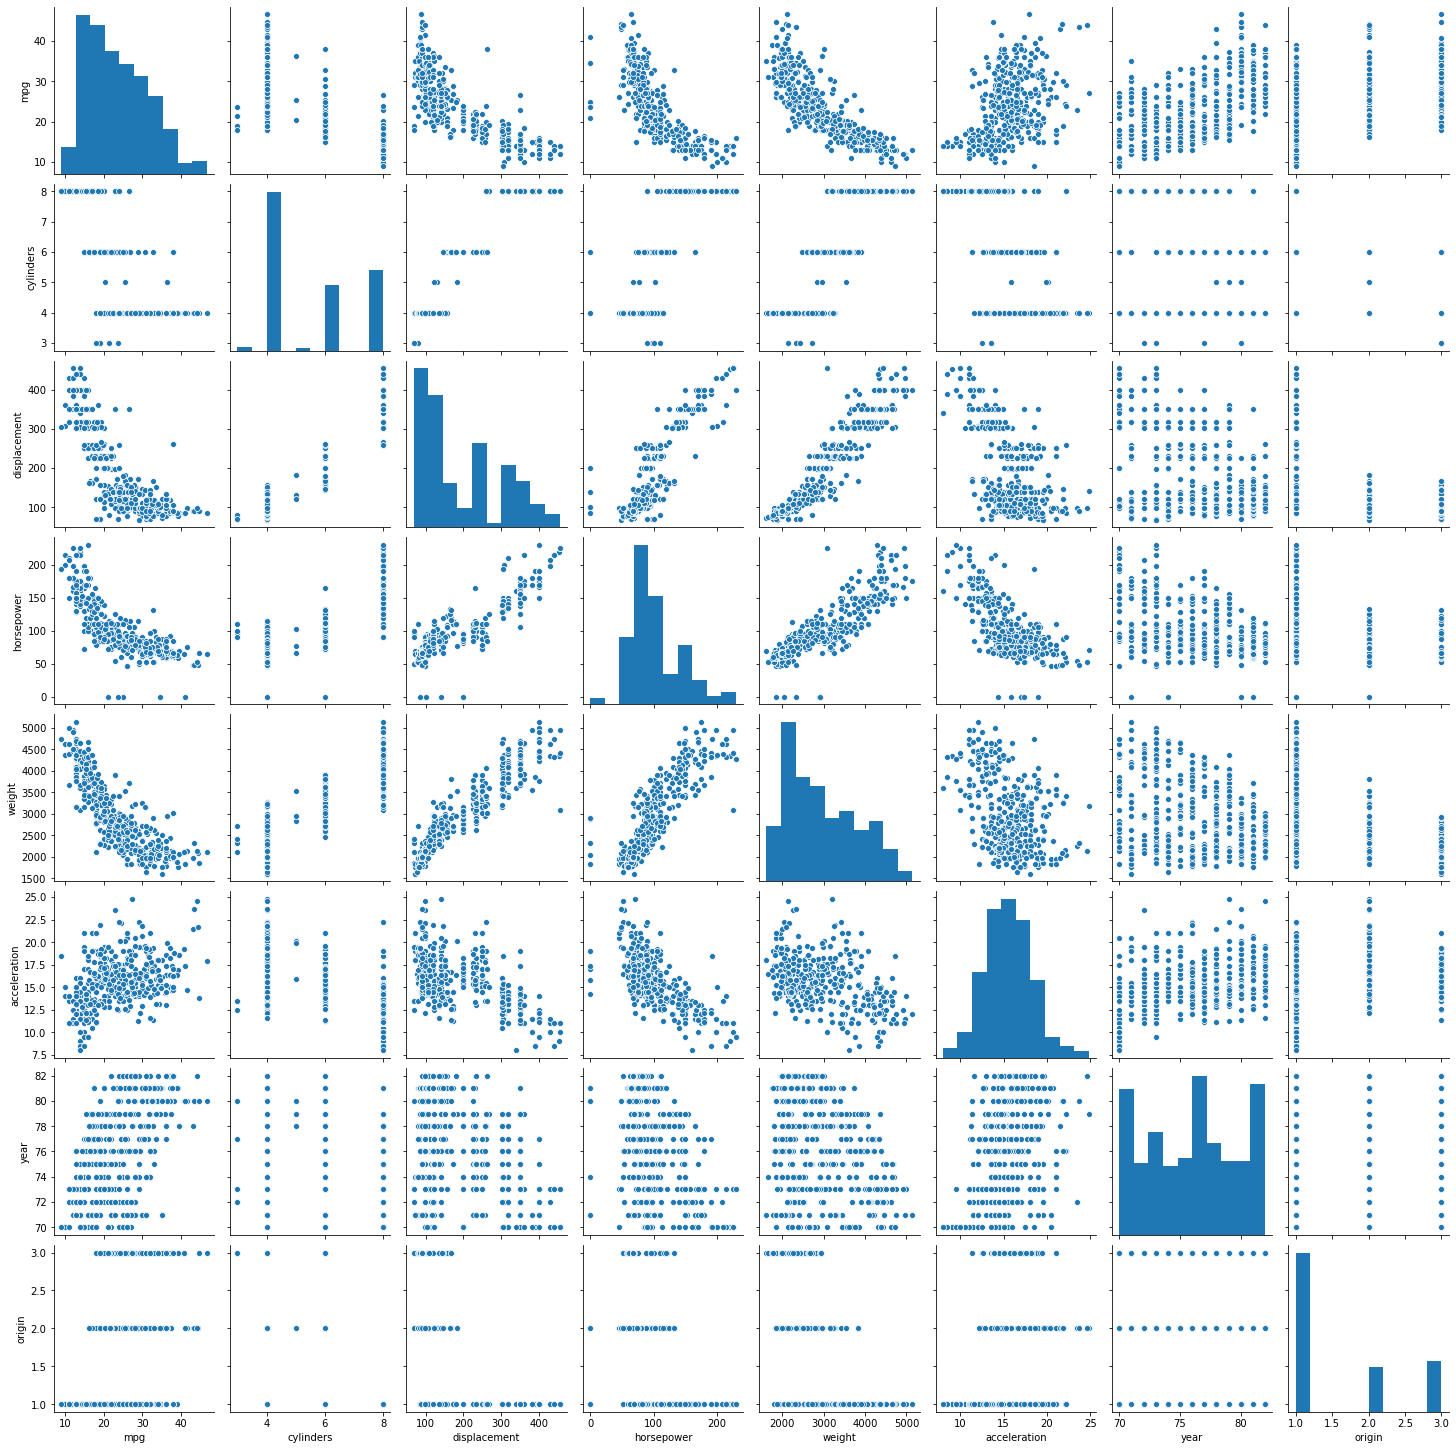

In [82]:
### Part II
sns.pairplot(df)


In [83]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,103.153652,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,39.986602,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,92.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [84]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.761004,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.823711,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.876741,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.761004,0.823711,0.876741,1.000000,0.845483,-0.670643,-0.405830,-0.427052
weight,-0.831739,0.897017,0.933104,0.845483,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.670643,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.405830,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.427052,-0.581265,0.210084,0.184314,1.000000


In [85]:
var_multi = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "year", "origin"]
x_multi = df[var_multi]
x_multi_w_intercept = np.concatenate([np.ones(shape = (x.shape[0], 1), dtype = np.float), x_multi], axis = 1)
print(x_multi_w_intercept[0:10, :])

multi_ols = sm.OLS(y, x_multi_w_intercept)
multi_result = multi_ols.fit()

print(multi_result.summary())

print(f"based on the f statistics, there is a relationship between predictors and the response.\n Displacement, weight, year, and acceleration are statistically significant")

[[1.000e+00 8.000e+00 3.070e+02 1.300e+02 3.504e+03 1.200e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 3.500e+02 1.650e+02 3.693e+03 1.150e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 3.180e+02 1.500e+02 3.436e+03 1.100e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 3.040e+02 1.500e+02 3.433e+03 1.200e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 3.020e+02 1.400e+02 3.449e+03 1.050e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 4.290e+02 1.980e+02 4.341e+03 1.000e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 4.540e+02 2.200e+02 4.354e+03 9.000e+00 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 4.400e+02 2.150e+02 4.312e+03 8.500e+00 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 4.550e+02 2.250e+02 4.425e+03 1.000e+01 7.000e+01
  1.000e+00]
 [1.000e+00 8.000e+00 3.900e+02 1.900e+02 3.850e+03 8.500e+00 7.000e+01
  1.000e+00]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                    

In [86]:
multi_regr = linear_model.LinearRegression()
multi_regr.fit(x_multi, y)

LinearRegression()

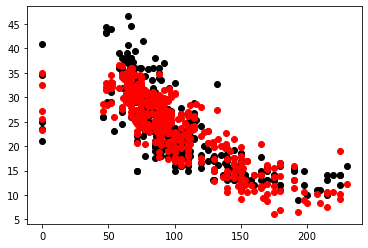

In [87]:
x_multi_array = x_multi.to_numpy()
x_multi_array[0:10, :]
df_pred['multi_pred_y'] = multi_regr.predict(x_multi_array)
plt.scatter(df_pred['x'], df_pred['y_actual'], color = "black")
plt.scatter(df_pred['x'], df_pred['multi_pred_y'], color = "red")

In [96]:
## Use interaction effects
poly = preprocessing.PolynomialFeatures(interaction_only = True)
inter_poly = poly.fit_transform(x_multi)

multi_inter = linear_model.LinearRegression()
multi_inter.fit(inter_poly, y)

LinearRegression()

In [97]:
print(f"the coefficients are {multi_inter.coef_}")

the coefficients are [[-8.09117927e+08  6.87903878e+00 -3.91131661e-01  5.54904910e-01
   8.64632512e-02 -5.74972875e+00  7.58635567e-01 -1.77479700e+01
  -2.60400361e-02 -4.41934815e-02  2.77876108e-03  2.22504326e-01
  -1.24400905e-01  5.48756381e-01  1.63727507e-03  1.23667200e-06
  -6.75933674e-04  1.52502451e-03  2.18616038e-01 -1.88096687e-04
   3.68230431e-02 -7.30244821e-03 -6.79270250e-02 -2.81616799e-03
  -4.41504132e-04 -8.77451199e-03  1.18820119e-01  3.88346406e-01
   1.52903041e-01]]


In [ ]:
## Use the statsmodel to generate p value for interaction terms